In [2]:
import numpy as np
import scipy.fftpack as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def signal_gen(coeffs,x_array,freqs):
    
    signal = np.zeros(len(x_array))
    
    for c,f in zip(coeffs,freqs):
        
        signal += c*np.sin(f*2*np.pi*x_array)
        
    return signal

In [4]:
# Number of samplepoints
N = 4096
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
coefficients = (0.5,0.7,0.1,0.9,0.6,0.5)
freqs = (50,200,30,76.789,125)

y = signal_gen(coefficients,x,freqs)

print(x.size)
print(y.size)

4096
4096


In [5]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

print("T:", str(T))
print("Max freq:", str(1.0/(2.0*T)))
print("N:", str(N))

T: 0.00125
Max freq: 400.0
N: 4096


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [6]:
print(xf.size)
print(yf.size)

2048
4096


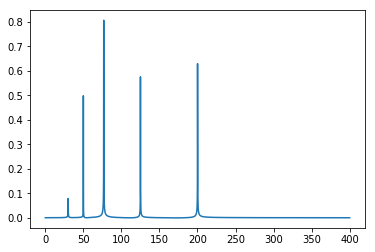

In [7]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [38]:
ls Data/

22_91_54_25_61.csv  63_68_84_27_57.csv  LgUe.csv
60_49_77_93_79.csv  91_65_3_80_80.csv


In [48]:
data = pd.read_csv('Data/60_49_77_93_79.csv')
data.shape[0]

8192

In [49]:
N_data = data.shape[0]
T_data = data['Time'][1] - data['Time'][0]

print(N_data)
print(T_data)
print(1.0/(2*T_data))

8192
0.0012208521548040534
409.54999999999995


In [50]:
### This works, but I don't know why. Will try with another file also.
### Update: works with other files with a freqmax of less than 200Hz
yf_data = np.fft.fft(data['Signal'])
xf_data = np.linspace(0.0, 1.0/(4.0*T_data), int(N_data/4))

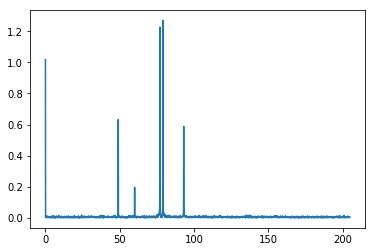

In [51]:
plt.plot(xf_data, 2.0/N * np.abs(yf_data[:N//2]))
plt.show()

# Figuring out the relationship between sampling intervals and the frequency array

In [52]:
data.shape
sampling_interval1 = data['Time'][1] - data['Time'][0]
sampling_interval2 = data['Time'][25] - data['Time'][24]
sampling_interval2 == sampling_interval1

False

In [53]:
print(data['Time'])

0        0.000000
1        0.001221
2        0.002442
3        0.003663
4        0.004883
5        0.006104
6        0.007325
7        0.008546
8        0.009767
9        0.010988
10       0.012209
11       0.013429
12       0.014650
13       0.015871
14       0.017092
15       0.018313
16       0.019534
17       0.020754
18       0.021975
19       0.023196
20       0.024417
21       0.025638
22       0.026859
23       0.028080
24       0.029300
25       0.030521
26       0.031742
27       0.032963
28       0.034184
29       0.035405
          ...    
8162     9.964595
8163     9.965816
8164     9.967037
8165     9.968258
8166     9.969479
8167     9.970700
8168     9.971920
8169     9.973141
8170     9.974362
8171     9.975583
8172     9.976804
8173     9.978025
8174     9.979246
8175     9.980466
8176     9.981687
8177     9.982908
8178     9.984129
8179     9.985350
8180     9.986571
8181     9.987791
8182     9.989012
8183     9.990233
8184     9.991454
8185     9.992675
8186     9

In [54]:
running_interval = 0
pos = 0

while pos < len(data['Time']) - 1:
    
    running_interval += data['Time'][pos + 1] - data['Time'][pos]
    
    pos += 1
    
sampling_interval = running_interval/(len(data['Time']) - 1)
sampling_frequency = 1/sampling_interval


X = np.fft.fft(data['Signal'])
freqs = np.fft.fftfreq(len(data['Signal'])) * sampling_frequency

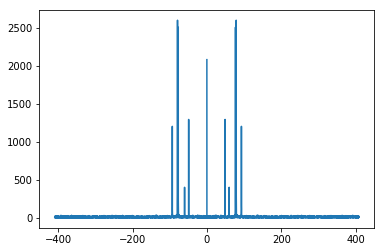

In [55]:
#60_49_77_93_79

plt.figure()
plt.plot(freqs,np.abs(X))
#plt.xlim(1,100)
plt.show()

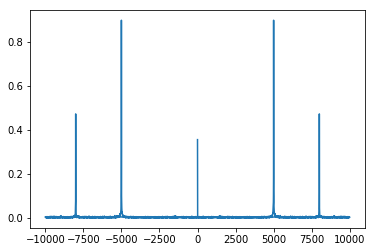

In [26]:
%matplotlib inline
import numpy as np
from scipy.fftpack import fft
# Number of samplepoints
N = 4096
# sample spacing
T = 1.0 / 20000
x = np.linspace(0.0, N*T, N)
y = np.sin(5000.0 * 2.0*np.pi*x) + 0.5*np.sin(8000.0 * 2.0*np.pi*x) + 0.35*np.random.random(4096)
yf = fft(y)
xf = np.fft.fftfreq(N) * 1/T
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf))
plt.show()